<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.8.0


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
#product_df = pd.read_csv('product_data.csv')
#review_df = pd.read_csv('reviews.csv')
product_df = pd.read_csv('/content/drive/MyDrive/Great L/SNLP /product_data.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Great L/SNLP /reviews.csv')
#review_df = pd.read_csv('reviews.csv')



In [ ]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
7,B002AS9WEA,Samsung,Samsung a167 Prepaid GoPhone (AT&T),https://www.amazon.com/Samsung-a167-Prepaid-Go...,https://m.media-amazon.com/images/I/61OXcZ-oef...,2.9000000,https://www.amazon.com/product-reviews/B002AS9WEA,18,0.0000000,0.0000000
411,B07FKD3H9Q,Apple,"Apple iPad mini 4 (32GB, Wi-Fi + Cellular, Spa...",https://www.amazon.com/Apple-Wi-Fi-Cellular-Sp...,https://m.media-amazon.com/images/I/41B0b1ysba...,5.0000000,https://www.amazon.com/product-reviews/B07FKD3H9Q,10,249.9900000,299.9500000
83,B00OZTSY6Y,Motorola,"Motorola DROID Turbo XT1254, Black Ballistic N...",https://www.amazon.com/Motorola-DROID-Turbo-Ba...,https://m.media-amazon.com/images/I/81VMO0Upxf...,3.6000000,https://www.amazon.com/product-reviews/B00OZTSY6Y,545,149.9900000,0.0000000
145,B01F5FYXNO,Samsung,"Samsung Galaxy J3, Verizon LTE Prepaid (Black)",https://www.amazon.com/Samsung-Galaxy-Verizon-...,https://m.media-amazon.com/images/I/71xoQNtbF1...,3.6000000,https://www.amazon.com/product-reviews/B01F5FYXNO,91,139.9700000,0.0000000
520,B07NC3N3Z8,Samsung,Samsung Galaxy S10 128GB / 8GB RAM SM-G973F Hy...,https://www.amazon.com/Samsung-SM-G973F-Dual-S...,https://m.media-amazon.com/images/I/61scEiXfaI...,4.3000000,https://www.amazon.com/product-reviews/B07NC3N3Z8,16,665.0000000,0.0000000


In [ ]:
review_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
9752,B00HPP3QD6,C. Ruta,1,"June 15, 2015",True,useless,It came out of the box not working right and h...,NaN
42911,B077NTKFDB,Alia,5,"June 28, 2019",True,Perfect condition,The phone is great. Perfect condition and batt...,NaN
5237,B00CEKXJ3Y,Ruben A.,5,"December 26, 2013",True,Great phone,The samsung galaxy s4 is awsome! It is great f...,NaN
53750,B07HQTWQVT,D. McGuigan,4,"January 18, 2019",False,Absolutely UNIQUE AND SEXY LOOKING stopgap so ...,Takeaway: This phone is a totally serviceable ...,1.0000000
6681,B00D99ZBR6,Meka,4,"December 3, 2013",True,Okay Phone,I like this phone but planning on returning it...,NaN


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
product_df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [ ]:
columns_to_drop = [ 'url', 'image','reviewUrl']
product_data = product_df.drop(columns_to_drop,axis=1)

In [ ]:
product_data.head(2)

,asin,brand,title,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
product_data.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,NaN,NaN,NaN,NaN
top,B0000SX2UC,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",NaN,NaN,NaN,NaN
freq,1,346,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [ ]:
review_df.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,NaN,2983,2,41489,59811,NaN
top,B00F2SKPIM,Amazon Customer,NaN,"December 11, 2019",True,Five Stars,Good,NaN
freq,981,6507,NaN,234,61225,6043,303,NaN
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

From the above summary we can make out that Samsung brand is the top brand and Apple iPhone 6s is the Top title. There are 720 total product title out of which 2 are apple iPhone and 10 are unique brands.
Price range is 0 to 999.
 last review on top title in the dataset is on december 11,2019.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

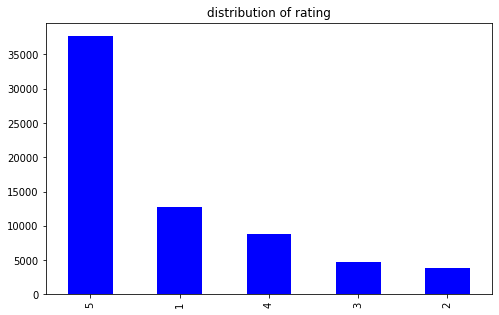

In [ ]:
review_df['rating'].value_counts().plot(kind='bar',color='blue',figsize=(8,5),title='distribution of rating')

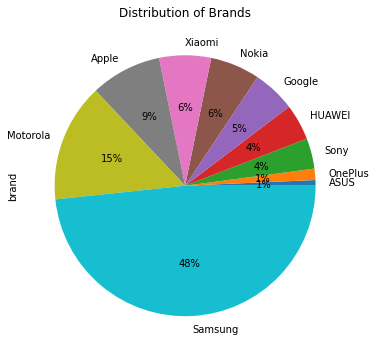

In [ ]:
product_data['brand'].value_counts().sort_values().plot(kind='pie',autopct='%1.0f%%',title='Distribution of Brands',figsize=(10,6))

### 4.5 Display average rating per brand

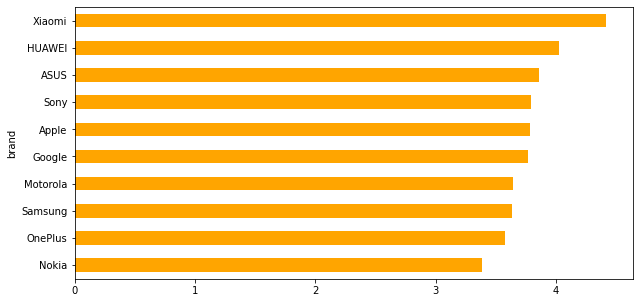

In [ ]:
product_data.groupby('brand').mean()['rating'].sort_values().plot(kind='barh',color='orange',figsize=(10,5))

### 4.6 Display average price per brand

In [ ]:
product_data.groupby('brand').mean()['price'].sort_values()

brand
Nokia      111.4438636
Motorola   139.1210476
Xiaomi     214.9676087
HUAWEI     218.8290625
Google     241.8676316
Samsung    256.5272543
Apple      303.5811111
ASUS       309.6860000
Sony       332.7248148
OnePlus    426.1960000
Name: price, dtype: float64

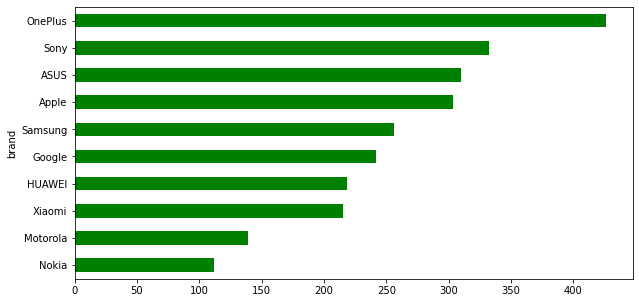

In [ ]:
product_data.groupby('brand').mean()['price'].sort_values().plot(kind='barh',color='green',figsize=(10,5))

### 4.7 Display average 'totalReviews' per brand

In [ ]:
product_data.groupby('brand').mean()['totalReviews'].sort_values()

brand
OnePlus     40.6000000
ASUS        52.6000000
HUAWEI      77.0937500
Motorola    89.7047619
Apple      100.2380952
Samsung    108.9624277
Google     111.5263158
Xiaomi     121.1739130
Sony       122.6666667
Nokia      140.5000000
Name: totalReviews, dtype: float64

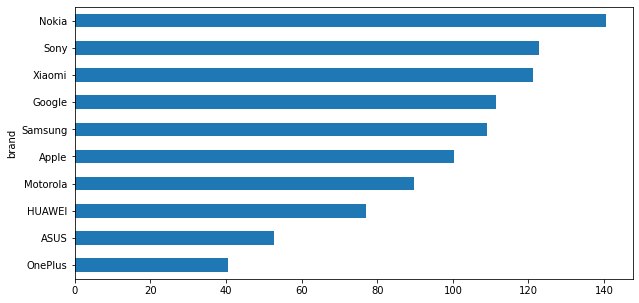

In [ ]:
product_data.groupby('brand').mean()['totalReviews'].sort_values().plot(kind='barh',figsize=(10,5))

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
df= pd.merge(review_df,product_data,on="asin")

In [ ]:
df.shape

(67986, 14)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            67986 non-null  object 
 1   name            67984 non-null  object 
 2   user_rating     67986 non-null  int64  
 3   date            67986 non-null  object 
 4   verified        67986 non-null  bool   
 5   review_title    67972 non-null  object 
 6   body            67965 non-null  object 
 7   helpfulVotes    27215 non-null  float64
 8   brand           67786 non-null  object 
 9   item_title      67986 non-null  object 
 10  overall_rating  67986 non-null  float64
 11  totalReviews    67986 non-null  int64  
 12  price           67986 non-null  float64
 13  originalPrice   67986 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 7.3+ MB


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [ ]:
dff = df[df['verified']==True]

In [ ]:
dff.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [ ]:
dff['brand'].value_counts() # samsung hasheighest number of reviews

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
dff= dff[['brand','body','price','user_rating','review_title']]

In [ ]:
dff.shape

(61225, 5)

In [ ]:
dff.head(5)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

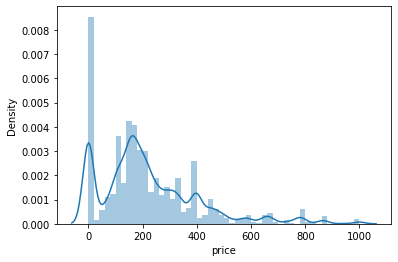

In [ ]:
sns.distplot(dff['price'])

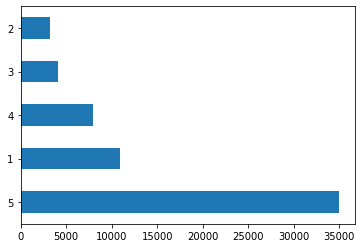

In [ ]:
dff['user_rating'].value_counts().plot(kind='barh')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [ ]:
dff['sentiment']=dff['user_rating'].apply(lambda x:1 if x>3 else(0 if x==3 else -1))

In [ ]:
dff.head(5)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1


### 4.15 Check frequency distribution of the 'sentiment'

---



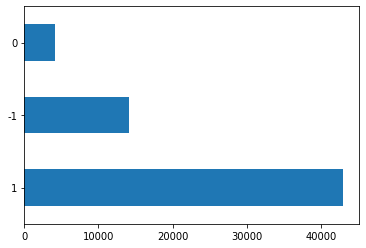

In [ ]:
dff['sentiment'].value_counts().plot(kind='barh') # most of the values have positive reviews

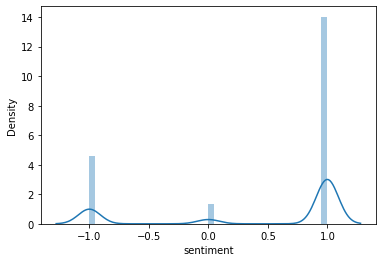

In [ ]:
sns.distplot(dff['sentiment'])

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [ ]:
dff.corr()# here price and sentimate

,price,user_rating,sentiment
price,1.0000000,0.0549462,0.0466878
user_rating,0.0549462,1.0000000,0.9694496
sentiment,0.0466878,0.9694496,1.0000000


In [ ]:
pd.crosstab(dff['brand'],dff['sentiment'])

sentiment,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


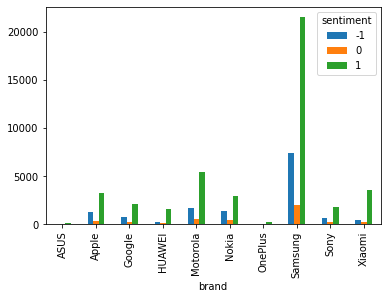

In [ ]:
pd.crosstab(dff['brand'],dff['sentiment']).plot(kind='bar')# so samsung has heighest positive review

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
dff['body'] = dff['body'].astype('str')

In [ ]:
dff['keywords'] = dff['body'].apply(lambda x : x.lower())

In [ ]:
dff.head(5)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,don't buy out of service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star because the phones locked so i have to ...
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1,the product has been very good. i had used thi...
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1,i bought this phone to replace an lg phone tha...
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,i purchased this phone for my at&t phone repla...


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
dff['keywords'] = dff['keywords'].str.replace('[^\w\s]', ' ',)

In [ ]:
dff.sample(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
19943,Motorola,"love it! great price, and now my phone bill is...",0.0000000,5,love it! great price,1,love it great price and now my phone bill is...
56628,Samsung,received it... thanks appreciate,649.9900000,4,thanks,1,received it thanks appreciate


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
len(stop)

179

In [ ]:
dff['keywords'] = dff['body'].apply(lambda words : ' '.join(word for word in words.split() if word not in stop)) 

In [ ]:
#example for lambda function just for understanding
sentence = "this is match of may and weather is hot"
stop_removed = ' '.join(word for word in sentence.split() if word not in stop)
stop_removed

'match may weather hot'

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:

import nltk
nltk.download("wordnet")
 
 #import nltk.tokenize.whitespaceToken()
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
dff['lem'] = dff['keywords'].apply(lemmatize_text)

In [ ]:
#just for understanding 
sentence = "Learnings compund over times"
print(lemmatize_text(sentence))

Learnings compund over time


In [ ]:
dff.sample(5)

,brand,body,price,user_rating,review_title,sentiment,keywords,lem
43489,Samsung,Kids love it,199.0000000,5,As described,1,Kids love,Kids love
42157,Apple,Muy buena su función,374.9900000,5,Excelente,1,Muy buena su función,Muy buena su función
42689,Apple,I'st not good it doens't work,499.9900000,1,Nada,-1,I'st good doens't work,I'st good doens't work
66645,Motorola,"This phone has solid performance, battery life...",119.9900000,5,"Solid phone, great price",1,"This phone solid performance, battery life, ca...","This phone solid performance, battery life, ca..."
1434,Samsung,"Great phone for 2010, now it seems outdated.",0.0000000,5,Five Stars,1,"Great phone 2010, seems outdated.","Great phone 2010, seems outdated."


### 5.5 Write a function to check word frequency of the text

In [ ]:
#def word_freq_dict(text):
 # words = text.split()
  #freqDict = word : words.count(word) for word in word
  #return freqDict 

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
word_freq =  dff['lem'].apply(word_count)

In [ ]:
word_freq.head(5)

14    {'DON'T': 1, 'BUY': 1, 'OUT': 1, 'OF': 1, 'SER...
17    {'1': 1, 'star': 1, 'phone': 1, 'locked': 1, '...
18    {'The': 1, 'product': 1, 'good.': 1, 'I': 2, '...
21    {'I': 9, 'bought': 1, 'phone': 4, 'replace': 1...
22    {'I': 1, 'purchased': 1, 'phone': 2, 'AT&T': 2...
Name: lem, dtype: object

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [ ]:
dff['sentiment'].value_counts()

 1    42939
-1    14158
 0     4128
Name: sentiment, dtype: int64

In [ ]:
highrated_df = dff[dff['sentiment']==1]
word_freq_highrated = highrated_df['lem'].apply(word_count)
word_freq_highrated.sample(5)

19247    {'Few': 1, 'scratch': 1, 'I': 1, 'anticipated'...
41493    {'It': 1, 'show': 1, 'sign': 1, 'wear': 1, '(i...
41041    {'Fantastic': 1, 'phone': 1, 'anyone': 1, 'cra...
34367                            {'Great': 1, 'phone!': 1}
53114    {'Its': 2, 'gaming.': 1, 'It': 1, 'cant': 1, '...
Name: lem, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
df_reviews_tfidf = tfidf_vectorizer.fit_transform(dff['lem'])

In [ ]:
df_reviews_tfidf

<61225x29231 sparse matrix of type '<class 'numpy.float64'>'
	with 1276126 stored elements in Compressed Sparse Row format>

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61225 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61225 non-null  object 
 7   lem           61225 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.2+ MB


In [ ]:
y1 = dff['sentiment']#RF
y2 = dff['user_rating']#

### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_1, X_test_1, y1_train, y1_test = train_test_split(df_reviews_tfidf, y1, random_state=1,stratify =y1,test_size=0.3)
X_train_2, X_test_2, y2_train, y2_test = train_test_split(df_reviews_tfidf, y2, random_state=1,stratify =y2,test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf1 = RandomForestClassifier(max_depth=100)
rfclf1.fit(X_train_1,y1_train)
print(rfclf1.score(X_train_1,y1_train))
print(rfclf1.score(X_test_1,y1_test))

0.9309097696992323
0.8250217770034843


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_2,y2_train)
print(xgb.score(X_train_2,y2_train))
print(xgb.score(X_test_2,y2_test))

0.6552721842406142
0.6438915505226481


In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred = rfclf1.predict(X_test_1)
confusion_matrix(y1_test,y1_pred)

array([[ 2413,     0,  1835],
       [  242,    43,   953],
       [  184,     0, 12698]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))


              precision    recall  f1-score   support

          -1       0.85      0.57      0.68      4248
           0       1.00      0.03      0.07      1238
           1       0.82      0.99      0.90     12882

    accuracy                           0.83     18368
   macro avg       0.89      0.53      0.55     18368
weighted avg       0.84      0.83      0.79     18368



In [ ]:
from sklearn.metrics import confusion_matrix
y2_pred = xgb.predict(X_test_2)
confusion_matrix(y2_test,y2_pred)

array([[ 1431,     2,     2,    17,  1821],
       [  286,     4,     4,    13,   667],
       [  166,     0,     9,    27,  1036],
       [   84,     0,     2,    65,  2231],
       [  149,     0,     1,    33, 10318]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y2_pred))


              precision    recall  f1-score   support

           1       0.68      0.44      0.53      3273
           2       0.67      0.00      0.01       974
           3       0.50      0.01      0.01      1238
           4       0.42      0.03      0.05      2382
           5       0.64      0.98      0.78     10501

    accuracy                           0.64     18368
   macro avg       0.58      0.29      0.28     18368
weighted avg       0.61      0.64      0.55     18368



## 7. Write your conclusion

In [1]:
##According to the classification report, the dataset is unbalanced as a result of which model is classified, with a bias toward class 5. 
##To improve the model's performance, we must revise the dataset or use other techniques such as SMOTE for imbalance datasets.